<h1 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h1>
<h2 style="text-align:center;">FACULTAD DE INGENIERÍA DE SISTEMAS</h2>
<h3 style="text-align:center;">INGENIERÍA EN CIENCIA DE LA COMPUTACION</h3>

**PERÍODO ACADÉMICO:** 2025-B  
**ASIGNATURA:** ICCD412 Métodos Numéricos  
**GRUPO:** GR1  
**Taller 05**   
**ALUMNO:** Carrion Mauricio

##### **A)  Interpole los puntos:**
##### $p1 = (5.4, 3.2)$
##### $p2 = (9.5, 0.7)$
##### $p3 = (12.3, -3.6)$


In [2]:
# -*- coding: utf-8 -*-


"""
Python 3
17 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""


# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

[12-16 14:43:48][INFO] Mauricio| 2025-12-16 14:43:48.555049


In [3]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

m, b = ajustar_min_cuadrados([5.4, 9.5 , 12.3], [3.2, 0.7, -3.6], [der_parcial_1, der_parcial_0])
print(f"m: {m}, b: {b}")

[12-16 14:43:48][INFO] Se ajustarán 2 parámetros.
m: -0.9577913091613628, b: 8.783974536396357


[12-16 14:43:51][INFO] Se ajustarán 2 parámetros.
------------------------------
Resultados del ajuste:
Pendiente (m): -0.9578
Intercepto (b): 8.7840
Ecuación final: y = -0.96x + 8.78
------------------------------


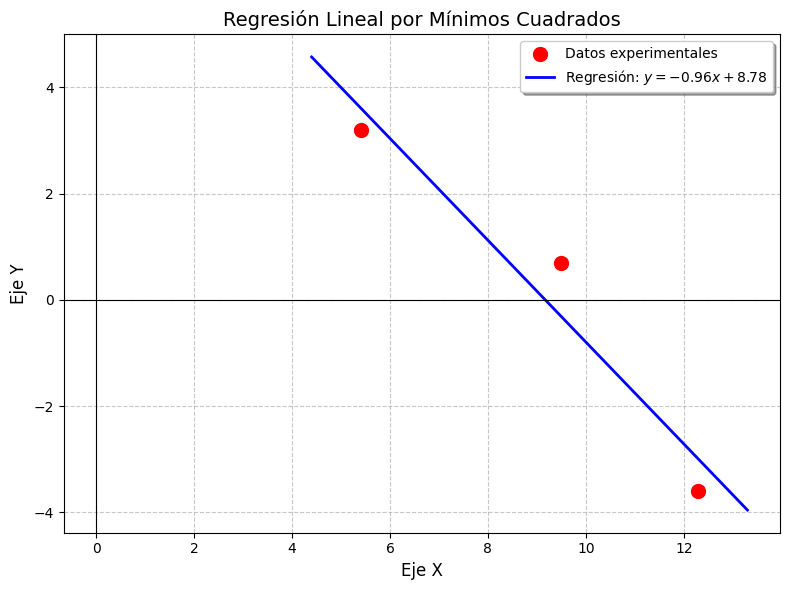

In [4]:
import matplotlib.pyplot as plt
xs = [5.4, 9.5, 12.3]
ys = [3.2, 0.7, -3.6]

gradiente_funcs = [der_parcial_1, der_parcial_0]

solucion_vector = ajustar_min_cuadrados(xs, ys, gradiente_funcs)

m_calc = solucion_vector[0] # Pendiente
b_calc = solucion_vector[1] # Intercepto

print("-" * 30)
print(f"Resultados del ajuste:")
print(f"Pendiente (m): {m_calc:.4f}")
print(f"Intercepto (b): {b_calc:.4f}")
print(f"Ecuación final: y = {m_calc:.2f}x + {b_calc:.2f}")
print("-" * 30)

plt.figure(figsize=(8, 6)) 

plt.scatter(
    xs,
    ys,
    color='red',
    s=100,         
    zorder=5,      
    label='Datos experimentales'
)

x_linea = np.linspace(min(xs) - 1, max(xs) + 1, 100)

y_linea = m_calc * x_linea + b_calc

plt.plot(
    x_linea,
    y_linea,
    color='blue',
    linewidth=2,
    linestyle='-',
    label=f'Regresión: $y = {m_calc:.2f}x + {b_calc:.2f}$'
)

plt.title('Regresión Lineal por Mínimos Cuadrados', fontsize=14)
plt.xlabel('Eje X', fontsize=12)
plt.ylabel('Eje Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

# Añadir la leyenda
plt.legend(loc='best', frameon=True, shadow=True)

# Mostrar la gráfica final
plt.tight_layout()
plt.show()

In [5]:
# B) Conjuto de datos 1
xs = [ 3.38, 0.35,2.07,-0.45,-0.55,-1.06,-2.77,3.08,-3.98,-5, -3.18,-1.96,2.37,-1.66,4.09]
ys = [-0.04,1.28,0.65,2.18,1.70,1.96,3.36,0.18,3.35,4.16,2.95,2.34,0.38,1.75,-1.06]

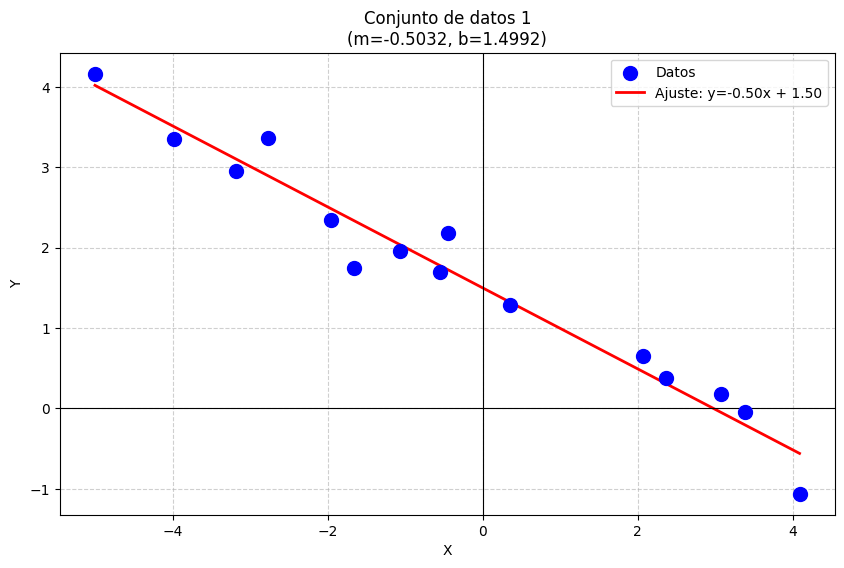

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Datos
xs = [ 3.38, 0.35, 2.07, -0.45, -0.55, -1.06, -2.77, 3.08, -3.98, -5, -3.18, -1.96, 2.37, -1.66, 4.09]
ys = [-0.04, 1.28, 0.65, 2.18, 1.70, 1.96, 3.36, 0.18, 3.35, 4.16, 2.95, 2.34, 0.38, 1.75, -1.06]

# 2. Calcular pendiente (m) y corte (b) para la línea de regresión
# Usamos polyfit de numpy para calcularlo rápido (grado 1 = lineal)
m, b = np.polyfit(xs, ys, 1)

# 3. Crear puntos para la recta
x_recta = np.linspace(min(xs), max(xs), 100)
y_recta = m * x_recta + b

# 4. Generar el gráfico
plt.figure(figsize=(10, 6))

# Puntos originales
plt.scatter(xs, ys, color='blue', label='Datos', s=100, zorder=5)

# Recta de regresión
plt.plot(x_recta, y_recta, color='red', linewidth=2, label=f'Ajuste: y={m:.2f}x + {b:.2f}')

# Configuración
plt.title(f'Conjunto de datos 1\n(m={m:.4f}, b={b:.4f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.8) # Eje X
plt.axvline(0, color='black', linewidth=0.8) # Eje Y
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

In [7]:
# Conjuto de datos 2
xs = [3.38, 0.35, 2.07, -0.45, -0.56, -1.06, -2.78, 3.08, -3.99, -5.00, -3.18, -1.97, 2.37, -1.67, 4.09, -4.60, 2.68, 2.78, -3.79, -1.87]
ys = [15.65, -11.20, -4.00, 18.03, 7.94, 15.32, -4.40, 1.39, -11.92, -90.24, 6.92, 28.35, -2.41, -5.47, 35.91, -55.53, 0.77, 4.79, -27.05, 2.85]


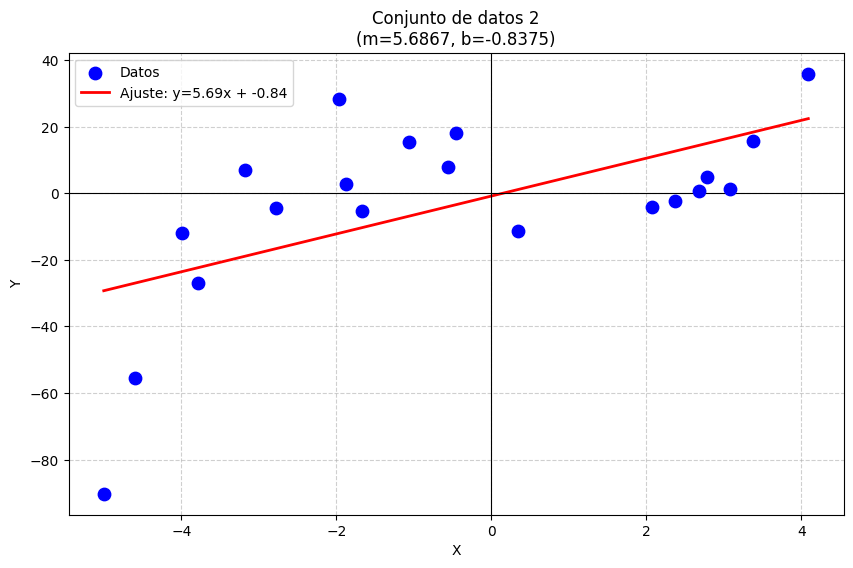

In [8]:
import matplotlib.pyplot as plt
import numpy as np

xs = [3.38, 0.35, 2.07, -0.45, -0.56, -1.06, -2.78, 3.08, -3.99, -5.00, -3.18, -1.97, 2.37, -1.67, 4.09, -4.60, 2.68, 2.78, -3.79, -1.87]
ys = [15.65, -11.20, -4.00, 18.03, 7.94, 15.32, -4.40, 1.39, -11.92, -90.24, 6.92, 28.35, -2.41, -5.47, 35.91, -55.53, 0.77, 4.79, -27.05, 2.85]

m, b = np.polyfit(xs, ys, 1)

x_recta = np.linspace(min(xs), max(xs), 100)
y_recta = m * x_recta + b

plt.figure(figsize=(10, 6))

plt.scatter(xs, ys, color='blue', label='Datos', s=80, zorder=5)

plt.plot(x_recta, y_recta, color='red', linewidth=2, label=f'Ajuste: y={m:.2f}x + {b:.2f}')

# Configuración
plt.title(f'Conjunto de datos 2\n(m={m:.4f}, b={b:.4f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

In [ ]:
def der_parcial_cubica_3(xs: list, ys: list) -> tuple:
    """Retorna coeficientes para la derivada respecto a a3"""
    # Ecuación: a3*Σx^6 + a2*Σx^5 + a1*Σx^4 + a0*Σx^3 = Σx^3*y
    return (
        sum(x**6 for x in xs), # coef a3
        sum(x**5 for x in xs), # coef a2
        sum(x**4 for x in xs), # coef a1
        sum(x**3 for x in xs), # coef a0
        sum((x**3) * y for x, y in zip(xs, ys)) # término indep
    )

def der_parcial_cubica_2(xs: list, ys: list) -> tuple:
    """Retorna coeficientes para la derivada respecto a a2"""
    # Ecuación: a3*Σx^5 + a2*Σx^4 + a1*Σx^3 + a0*Σx^2 = Σx^2*y
    return (
        sum(x**5 for x in xs),
        sum(x**4 for x in xs),
        sum(x**3 for x in xs),
        sum(x**2 for x in xs),
        sum((x**2) * y for x, y in zip(xs, ys))
    )

def der_parcial_cubica_1(xs: list, ys: list) -> tuple:
    """Retorna coeficientes para la derivada respecto a a1"""
    # Ecuación: a3*Σx^4 + a2*Σx^3 + a1*Σx^2 + a0*Σx = Σx*y
    return (
        sum(x**4 for x in xs),
        sum(x**3 for x in xs),
        sum(x**2 for x in xs),
        sum(x for x in xs),
        sum(x * y for x, y in zip(xs, ys))
    )

def der_parcial_cubica_0(xs: list, ys: list) -> tuple:
    """Retorna coeficientes para la derivada respecto a a0 (término independiente)"""
    # Ecuación: a3*Σx^3 + a2*Σx^2 + a1*Σx + a0*n = Σy
    return (
        sum(x**3 for x in xs),
        sum(x**2 for x in xs),
        sum(x for x in xs),
        len(xs),
        sum(ys)
    )

xs = [3.38, 0.35, 2.07, -0.45, -0.56, -1.06, -2.78, 3.08, -3.99, -5.00, -3.18, -1.97, 2.37, -1.67, 4.09, -4.60, 2.68, 2.78, -3.79, -1.87]
ys = [15.65, -11.20, -4.00, 18.03, 7.94, 15.32, -4.40, 1.39, -11.92, -90.24, 6.92, 28.35, -2.41, -5.47, 35.91, -55.53, 0.77, 4.79, -27.05, 2.85]

# Ordenamos el gradiente [d_a3, d_a2, d_a1, d_a0]
gradiente_cubico = [der_parcial_cubica_3, der_parcial_cubica_2, der_parcial_cubica_1, der_parcial_cubica_0]

coeffs = ajustar_min_cuadrados(xs, ys, gradiente_cubico)

a3, a2, a1, a0 = coeffs
print(f"Ecuación cúbica: y = {a3:.4f}x^3 + {a2:.4f}x^2 + {a1:.4f}x + {a0:.4f}")

[12-16 14:50:50][INFO] Se ajustarán 4 parámetros.
Ecuación cúbica: y = 1.0450x^3 + 0.0313x^2 + -8.8807x + 2.7623


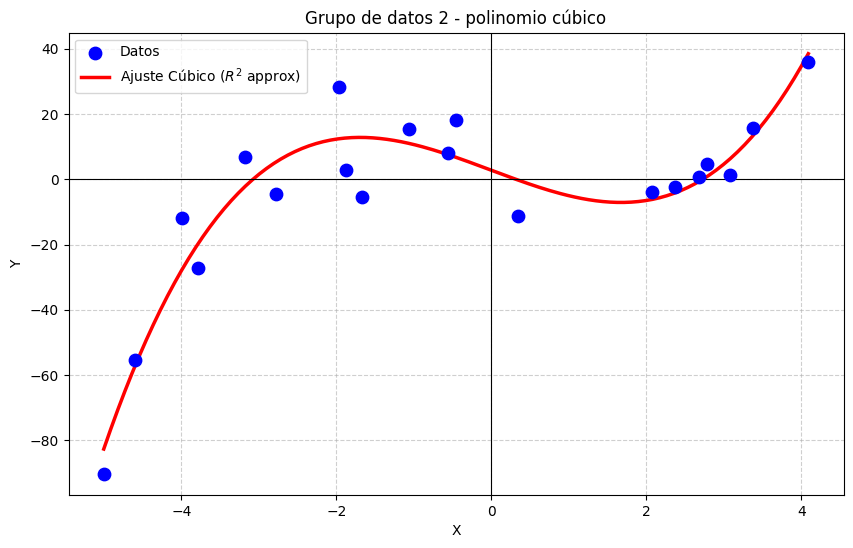

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_curve = np.linspace(min(xs), max(xs), 200)

# Evaluar polinomio usando los coeficientes calculados en la celda anterior
y_curve = coeffs[0]*x_curve**3 + coeffs[1]*x_curve**2 + coeffs[2]*x_curve + coeffs[3]

plt.figure(figsize=(10, 6))

# Puntos originales
plt.scatter(xs, ys, color='blue', label='Datos', s=80, zorder=5)

# Curva Cúbica
plt.plot(x_curve, y_curve, color='red', linewidth=2.5, 
         label=f'Ajuste Cúbico ($R^2$ approx)')

plt.title('Grupo de datos 2 - polinomio cúbico')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()

plt.show()